# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread


#### 2. Lee una imagen
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [3]:
image = imread('data/foto_clase.png')
image.shape

(797, 1767, 4)

Muestra la imagen para ver que se ha cargado bien

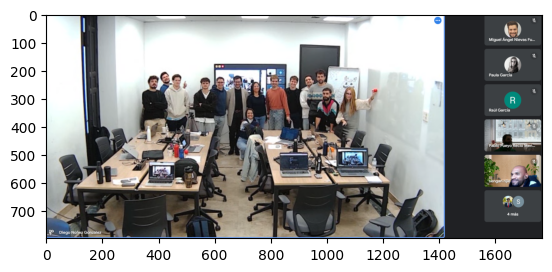

In [4]:
plt.imshow(image)

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [11]:
img_transf = image.reshape(-1,4)
img_transf.shape

(1408299, 4)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [28]:
kmeans = KMeans(n_clusters=64, n_init=42, random_state=42).fit(img_transf)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizlos para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [31]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]


#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [32]:
segmented_img = segmented_img.reshape(image.shape)


#### 7. Imprime y guarda en tu ordenador la imagen resultante

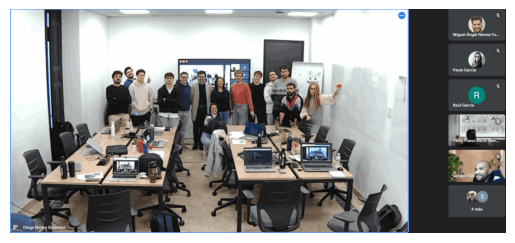

In [33]:
plt.imshow(segmented_img)
plt.axis('off')
plt.savefig("knn_image.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [35]:
def knn_to_image (imagepath,colors,save=True,show=True):
    image = imread(imagepath)
    img_transf = image.reshape(-1,4)
    kmeans = KMeans(n_clusters=colors, n_init=42, random_state=42).fit(img_transf)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    plt.imshow(segmented_img)
    plt.axis('off')
    if save==True:
        plt.savefig(f"knn_image_{colors}.png", format="png", dpi=300, bbox_inches="tight")
    if show==True:
        plt.show()



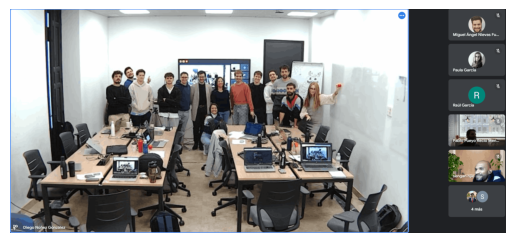

In [36]:
knn_to_image('data/foto_clase.png',128)

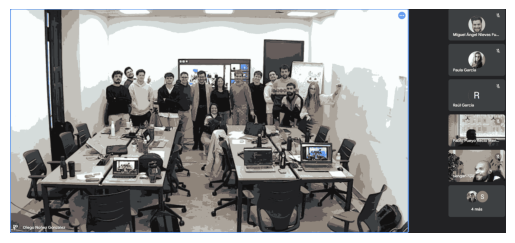

In [37]:
knn_to_image('data/foto_clase.png',10)